# EDA Shopping Behavior

In [33]:
!pip install geopy
!pip install geopandas

In [34]:
!pip install matplotlib -q
!pip install seaborn -q

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import numpy as np
import folium
from geopy.geocoders import Nominatim
from folium.plugins import MarkerCluster
import geopandas as gpd

font_path = 'c:\\Windows\\Fonts\\GULIM.TTC' # 윈도우 OS 폰트 경로
font_prop = fm.FontProperties (fname=font_path)
font_name = font_prop.get_name() # 폰트명
matplotlib.rc('font', family=font_name)

plt.rc('axes', unicode_minus=False)

### 01. 데이터 수집 및 로드

In [36]:
shopping_df = pd.read_csv('../data/shopping_behavior_updated.csv')
shopping_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### 02. 데이터구조 및 변수 이해

In [37]:
print(shopping_df.shape)
print(shopping_df.dtypes)
shopping_df.info()

(3900, 18)
Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null  

### 03. 데이터 요약 및 기술통계

In [38]:
# 수치형 컬럼
numeric_df = shopping_df.select_dtypes(include=['number'])

# 범주형 컬럼
categorical_df = shopping_df.select_dtypes(include=['object', 'category'])

display(numeric_df.describe())
display(categorical_df.describe())

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


### 04. 결측치, 이상치

In [39]:
shopping_df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [40]:
shopping_df.duplicated('Customer ID').sum()

np.int64(0)

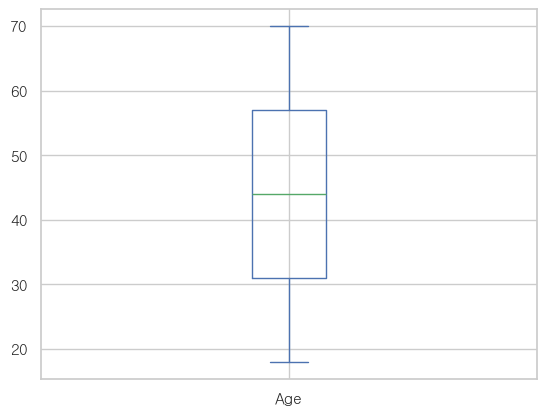

In [41]:
shopping_df['Age'].plot(kind='box')
plt.show()

### 05. 변수분포 시각화

In [42]:
# 컬러 종류
shopping_df["Color"].unique()

array(['Gray', 'Maroon', 'Turquoise', 'White', 'Charcoal', 'Silver',
       'Pink', 'Purple', 'Olive', 'Gold', 'Violet', 'Teal', 'Lavender',
       'Black', 'Green', 'Peach', 'Red', 'Cyan', 'Brown', 'Beige',
       'Orange', 'Indigo', 'Yellow', 'Magenta', 'Blue'], dtype=object)

In [43]:
# 상품의 종류
shopping_df["Item Purchased"].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

> ### 구독 여부

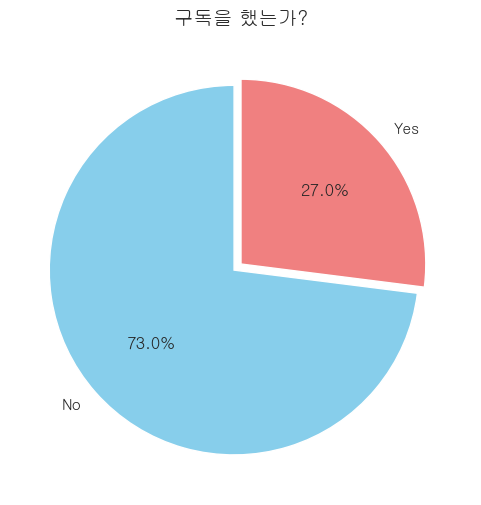

In [44]:
# 전체 모집단 중 구독 여부
sub_counts = shopping_df['Subscription Status'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    sub_counts,
    labels=sub_counts.index,
    autopct='%.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral'],
    explode=[0.05, 0]  # Yes 쪽 살짝 강조
)
plt.title('구독을 했는가?', fontsize=14)
plt.show()

> ### 모집단 수 분포 및 연령대 분리

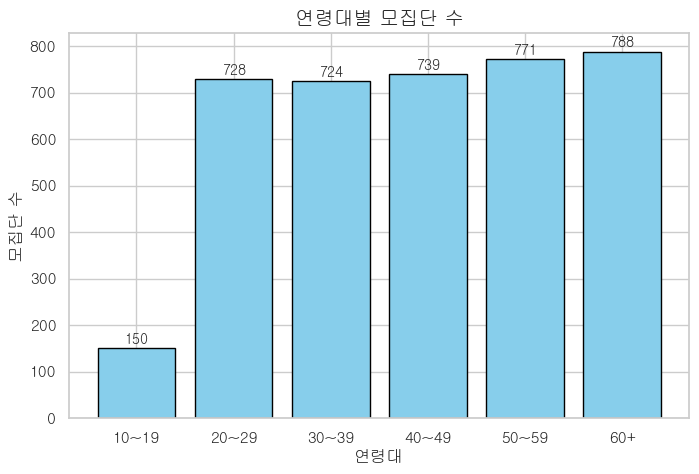

In [ ]:
# 나이대별 모집단 수 분포
age_10to20 = shopping_df[(shopping_df['Age'] >= 10) & (shopping_df['Age'] < 20)].shape[0]
age_20to30 = shopping_df[(shopping_df['Age'] >= 20) & (shopping_df['Age'] < 30)].shape[0]
age_30to40 = shopping_df[(shopping_df['Age'] >= 30) & (shopping_df['Age'] < 40)].shape[0]
age_40to50 = shopping_df[(shopping_df['Age'] >= 40) & (shopping_df['Age'] < 50)].shape[0]
age_50to60 = shopping_df[(shopping_df['Age'] >= 50) & (shopping_df['Age'] < 60)].shape[0]
age_50up = shopping_df[shopping_df['Age'] >= 60].shape[0]

age_groups = ['10~19', '20~29', '30~39', '40~49', '50~59', '60+']
counts = [age_10to20, age_20to30, age_30to40, age_40to50, age_50to60, age_50up]

plt.figure(figsize=(8, 5))

plt.bar(age_groups, counts, color='skyblue', edgecolor='black')

plt.title('연령대별 모집단 수', fontsize=14)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('모집단 수', fontsize=12)

for i, count in enumerate(counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

In [46]:
# 청년층 (18~34)
youth = shopping_df[(shopping_df['Age'] >= 18) & (shopping_df['Age'] <= 34)].shape[0]

# 중년층 (35~49)
middle = shopping_df[(shopping_df['Age'] >= 35) & (shopping_df['Age'] <= 49)].shape[0]

# 장년층 (50~64)
senior = shopping_df[(shopping_df['Age'] >= 50) & (shopping_df['Age'] <= 64)].shape[0]

# 고령층 (65세 이상)
elderly = shopping_df[shopping_df['Age'] >= 65].shape[0]

print("청년층(18~34세):", youth)
print("중년층(35~49세):", middle)
print("장년층(50~64세):", senior)
print("고령층(65세 이상):", elderly)

청년층(18~34세): 1241
중년층(35~49세): 1100
장년층(50~64세): 1132
고령층(65세 이상): 427


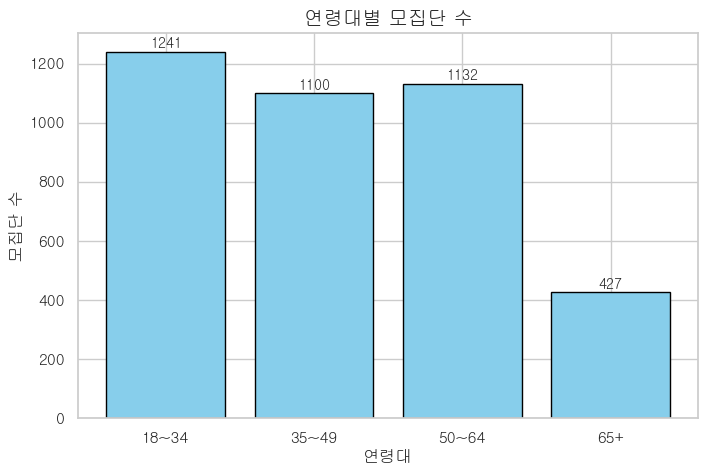

In [47]:
age_groups = ['18~34', '35~49', '50~64', '65+']
counts = [youth, middle, senior, elderly]

plt.figure(figsize=(8, 5))

plt.bar(age_groups, counts, color='skyblue', edgecolor='black')

plt.title('연령대별 모집단 수', fontsize=14)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('모집단 수', fontsize=12)

for i, count in enumerate(counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

In [48]:
def location_separate(location):
    
    EAST_STATES = ('Alabama', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Maine', 'Maryland', 'Massachusetts', 'Mississippi', 'New Hampshire', 'New Jersey', 'New York', 'North Carolina', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Vermont', 'Virginia', 'West Virginia')
    CENTRAL_STATES = ('Arkansas', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Louisiana', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'Oklahoma', 'South Dakota', 'Texas', 'Wisconsin')
        
    if location in EAST_STATES :
        return '동부'
    elif location in CENTRAL_STATES :
        return '중부'
    else:
        return '서부'    

    # 동부 (East)   Alabama, Connecticut, Delaware, Florida, Georgia, Kentucky, Maine, Maryland, Massachusetts, Mississippi, New Hampshire, New Jersey, New York, North Carolina, Pennsylvania, Rhode Island, South Carolina, Tennessee, Vermont, Virginia, West Virginia
    # 중부 (Central)   Arkansas, Illinois, Indiana, Iowa, Kansas, Louisiana, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, Oklahoma, South Dakota, Texas, Wisconsin
    # 서부 (West)   Alaska, Arizona, California, Colorado, Hawaii, Idaho, Montana, Nevada, New Mexico, Oregon, Utah, Washington, Wyoming

location_category = shopping_df['Location'].apply(location_separate)
shopping_df['Region'] = location_category           

shopping_df['Region'].value_counts()

Region
동부    1630
중부    1252
서부    1018
Name: count, dtype: int64

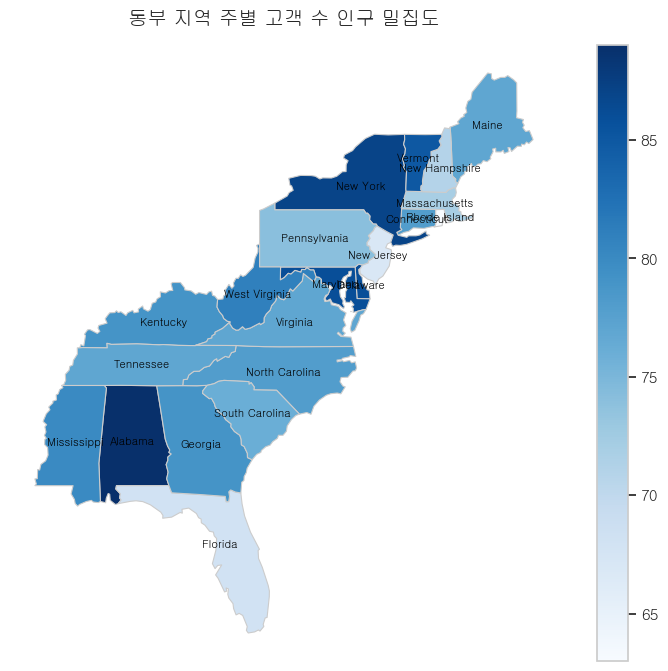

In [49]:
east_df = shopping_df[shopping_df['Region']=='동부']
east_location_counts = east_df['Location'].value_counts().reset_index()
east_location_counts.columns = ['state','count']


url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
states_gdf = gpd.read_file(url)


merged = states_gdf.merge(east_location_counts, left_on='name', right_on='state', how='left')
merged['count'] = merged['count'].fillna(0)


east_states = east_location_counts['state'].tolist()
merged_east = merged[merged['name'].isin(east_states)]


fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_east.plot(
    column='count',
    cmap='Blues',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    ax=ax
)


for idx, row in merged_east.iterrows():
    plt.text(
        row['geometry'].centroid.x,   
        row['geometry'].centroid.y,   
        row['name'],         
        fontsize=8,
        ha='center',
        va='center',
        color='black'
    )

ax.set_title('동부 지역 주별 고객 수 인구 밀집도', fontsize=14, pad=15)
ax.set_axis_off()
plt.show()


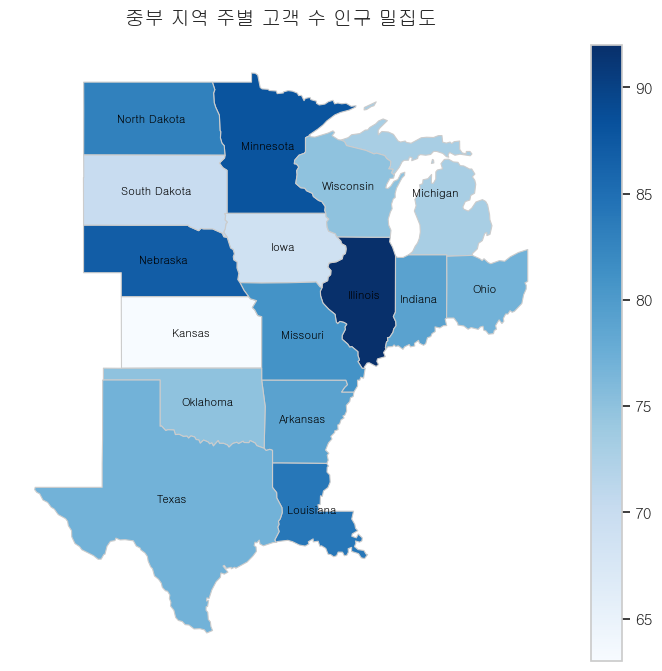

In [50]:
central_df  = shopping_df[shopping_df['Region']=='중부']
central_location_counts = central_df['Location'].value_counts().reset_index()
central_location_counts.columns = ['state','count']


url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
states_gdf = gpd.read_file(url)


merged = states_gdf.merge(central_location_counts, left_on='name', right_on='state', how='left')
merged['count'] = merged['count'].fillna(0)


east_states = central_location_counts['state'].tolist()
merged_east = merged[merged['name'].isin(east_states)]


fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_east.plot(
    column='count',
    cmap='Blues',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    ax=ax
)


for idx, row in merged_east.iterrows():
    plt.text(
        row['geometry'].centroid.x,   
        row['geometry'].centroid.y,   
        row['name'],         
        fontsize=8,
        ha='center',
        va='center',
        color='black'
    )

ax.set_title('중부 지역 주별 고객 수 인구 밀집도', fontsize=14, pad=15)
ax.set_axis_off()
plt.show()


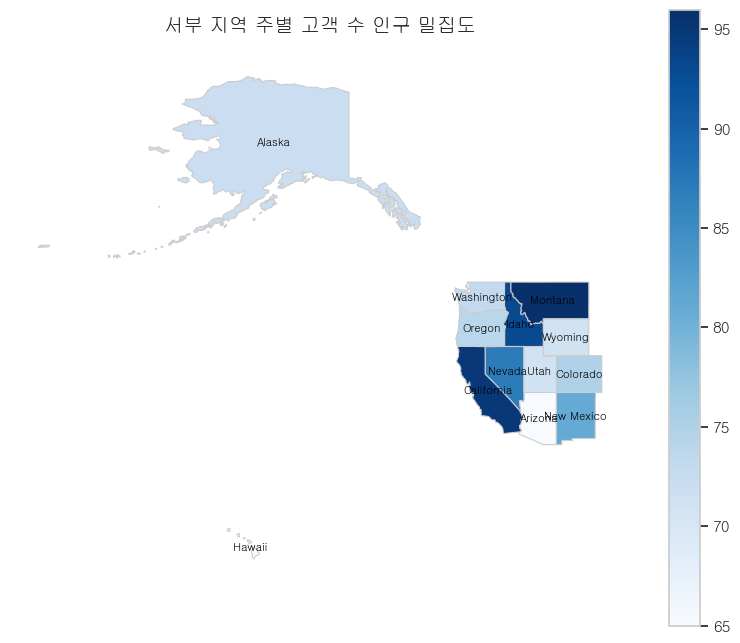

In [51]:
west_df  = shopping_df[shopping_df['Region']=='서부']
west_location_counts = west_df['Location'].value_counts().reset_index()
west_location_counts.columns = ['state','count']


url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
states_gdf = gpd.read_file(url)


merged = states_gdf.merge(west_location_counts, left_on='name', right_on='state', how='left')
merged['count'] = merged['count'].fillna(0)


east_states = west_location_counts['state'].tolist()
merged_east = merged[merged['name'].isin(east_states)]


fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_east.plot(
    column='count',
    cmap='Blues',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    ax=ax
)


for idx, row in merged_east.iterrows():
    plt.text(
        row['geometry'].centroid.x,   
        row['geometry'].centroid.y,   
        row['name'],         
        fontsize=8,
        ha='center',
        va='center',
        color='black'
    )

ax.set_title('서부 지역 주별 고객 수 인구 밀집도', fontsize=14, pad=15)
ax.set_axis_off()
plt.show()


### 06. 변수간 관계 시각화

> ### 성별, 구매항목에 따른 지출금액 평균

In [52]:
gender_item_df = pd.pivot_table(
    shopping_df,
    index='Gender',
    columns='Item Purchased',
    values='Purchase Amount (USD)',
    fill_value=0,
    aggfunc='mean',
    margins=True
).round(2)

gender_item_df


Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt,All
Gender,,,,,,,,,,,,,,,,,,,,,
Female,65.22,58.35,60.85,64.52,60.57,67.15,65.30,57.62,59.96,58.96,...,60.20,60.17,58.27,62.27,61.40,55.36,58.00,58.46,59.07,60.25
Male,58.71,60.62,60.90,61.62,56.39,59.89,58.84,58.05,61.34,57.60,...,61.64,62.27,60.88,58.27,58.80,59.81,60.96,57.36,64.66,59.54
All,60.39,59.84,60.88,62.62,57.61,62.17,60.55,57.89,60.88,58.06,...,61.14,61.60,60.08,59.51,59.55,58.19,59.93,57.70,62.91,59.76


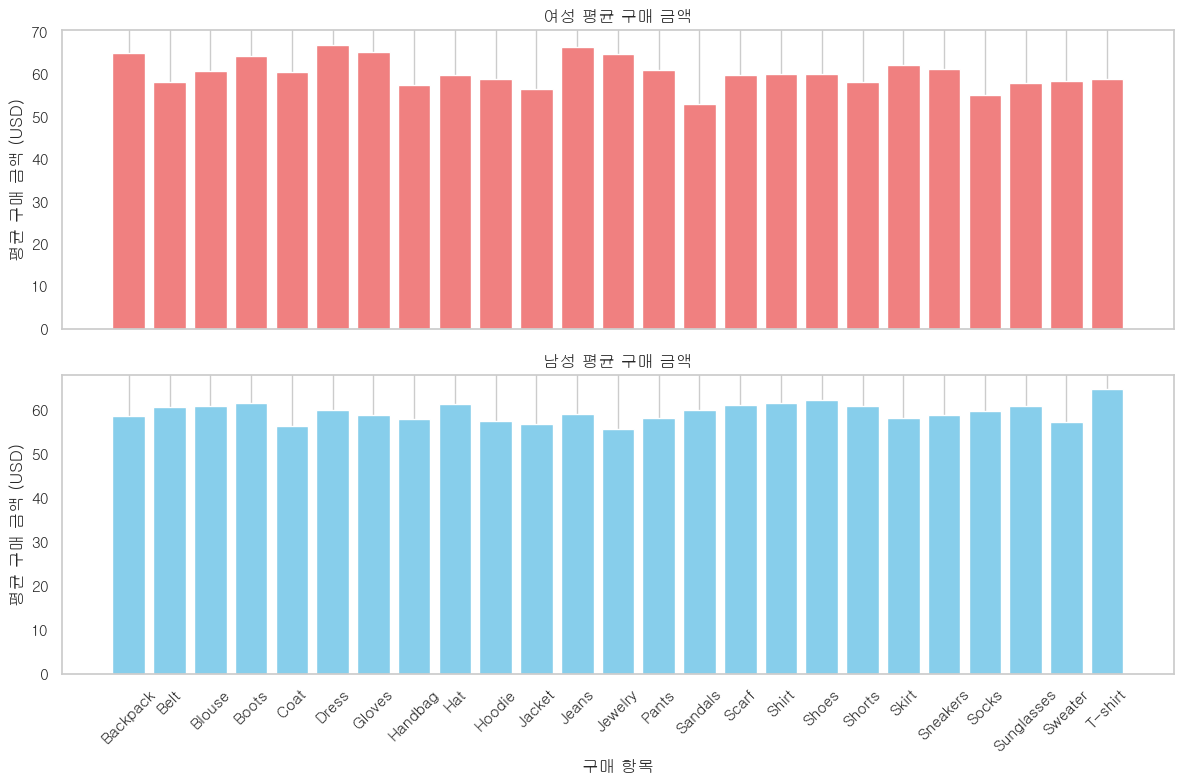

In [53]:
gender_item_plot = gender_item_df.drop('All').drop('All', axis=1)
genders = gender_item_plot.index
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 여성
ax[0].bar(gender_item_plot.columns, gender_item_plot.loc['Female'], color='lightcoral')
ax[0].set_title('여성 평균 구매 금액')
ax[0].set_ylabel('평균 구매 금액 (USD)')
ax[0].grid(axis='y')

# 남성
ax[1].bar(gender_item_plot.columns, gender_item_plot.loc['Male'], color='skyblue')
ax[1].set_title('남성 평균 구매 금액')
ax[1].set_ylabel('평균 구매 금액 (USD)')
ax[1].set_xlabel('구매 항목')
ax[1].grid(axis='y')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [54]:
# 연령대별 소비 금액의 평균
bins = [18, 35, 50, 65, 120]
labels = ['18~34', '35~49', '50~64', '65+']

shopping_df['Age_Group'] = pd.cut(shopping_df['Age'], bins=bins, labels=labels, right=False)

age_group_avg = shopping_df.groupby('Age_Group')['Purchase Amount (USD)'].sum()
print(age_group_avg)

Age_Group
18~34    74658
35~49    65013
50~64    67916
65+      25494
Name: Purchase Amount (USD), dtype: int64


C:\Users\tj\AppData\Local\Temp\ipykernel_18496\173954908.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg = shopping_df.groupby('Age_Group')['Purchase Amount (USD)'].sum()


In [55]:
top_items_by_age = (
    shopping_df.groupby(['Age_Group', 'Item Purchased'])
    .size()
    .reset_index(name='Count')
)

# 각 연령대별 상위 5개
top5_by_age = (
    top_items_by_age
    .sort_values(['Age_Group', 'Count'], ascending=[True, False])
    .groupby('Age_Group')
    .head(5)
)

print(top5_by_age.head(10))

   Age_Group Item Purchased  Count
16     18~34          Shirt     64
4      18~34           Coat     59
1      18~34           Belt     56
18     18~34         Shorts     55
19     18~34          Skirt     55
35     35~49         Jacket     58
38     35~49          Pants     57
40     35~49          Scarf     57
26     35~49           Belt     55
39     35~49        Sandals     52


C:\Users\tj\AppData\Local\Temp\ipykernel_18496\2255918189.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shopping_df.groupby(['Age_Group', 'Item Purchased'])
C:\Users\tj\AppData\Local\Temp\ipykernel_18496\2255918189.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Age_Group')


C:\Users\tj\AppData\Local\Temp\ipykernel_18496\3122647315.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


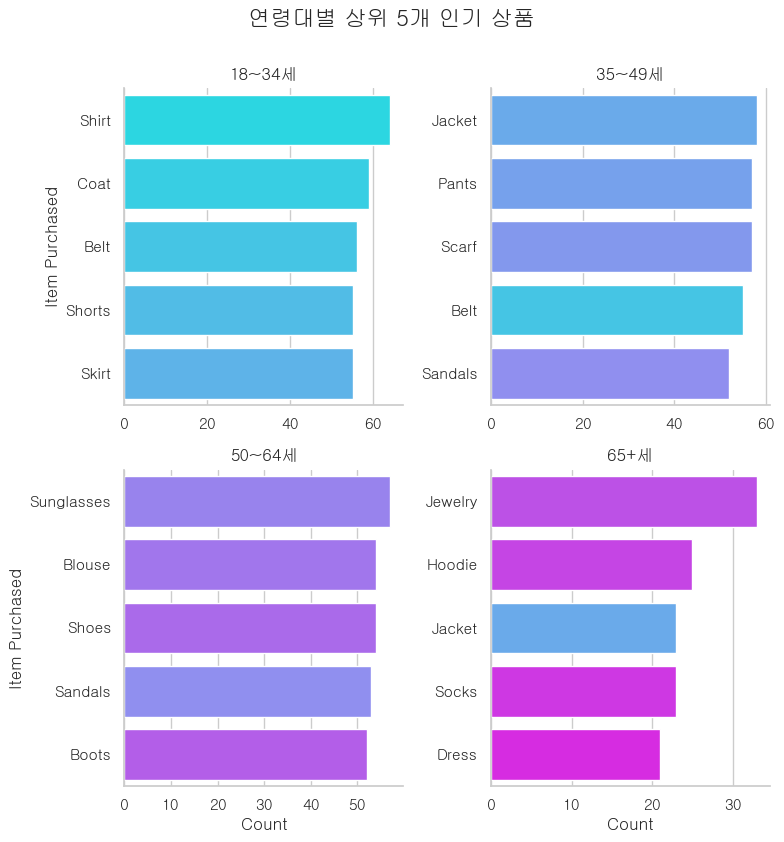

In [56]:
g = sns.catplot(
    data=top5_by_age,
    x='Count',
    y='Item Purchased',
    col='Age_Group',
    kind='bar',
    col_wrap=2,
    palette='cool',
    sharex=False,
    sharey=False,
    height=4
)

g.set_titles("{col_name}세")
g.fig.suptitle("연령대별 상위 5개 인기 상품", fontsize=16, y=1.05)
plt.show()

C:\Users\tj\AppData\Local\Temp\ipykernel_18496\4185823943.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shopping_df.groupby(['Age_Group', 'Color'])
C:\Users\tj\AppData\Local\Temp\ipykernel_18496\4185823943.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Age_Group')
C:\Users\tj\AppData\Local\Temp\ipykernel_18496\4185823943.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


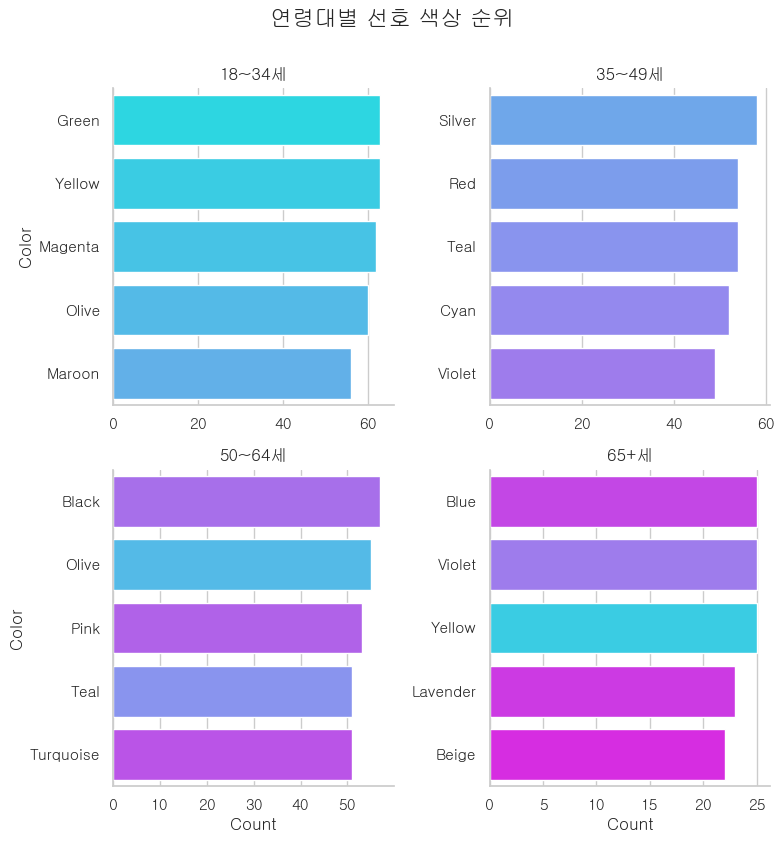

In [57]:
top_items_by_age = (
    shopping_df.groupby(['Age_Group', 'Color'])
    .size()
    .reset_index(name='Count')
)

# 각 연령대별 상위 5개
top5_by_age = (
    top_items_by_age
    .sort_values(['Age_Group', 'Count'], ascending=[True, False])
    .groupby('Age_Group')
    .head(5)
)

g = sns.catplot(
    data=top5_by_age,
    x='Count',
    y='Color',
    col='Age_Group',
    kind='bar',
    col_wrap=2,
    palette='cool',
    sharex=False,
    sharey=False,
    height=4
)

g.set_titles("{col_name}세")
g.fig.suptitle("연령대별 선호 색상 순위", fontsize=16, y=1.05)
plt.show()

In [58]:
def classify_item(item):
    if item in ['Shirt', 'T-shirt', 'Sweater', 'Blouse', 'Hoodie', 'Jacket', 'Coat']:
        return '상의'
    elif item in ['Jeans', 'Pants', 'Shorts', 'Skirt']:
        return '하의'
    elif item in ['Dress']:
        return '원피스'
    elif item in ['Shoes', 'Sneakers', 'Boots', 'Sandals']:
        return '신발'
    elif item in ['Handbag', 'Backpack']:
        return '가방'
    elif item in ['Scarf', 'Hat', 'Gloves', 'Belt', 'Jewelry', 'Sunglasses']:
        return '액세서리'
    else:
        return '기타'

shopping_df['Item Category (Refined)'] = shopping_df['Item Purchased'].apply(classify_item)

print(shopping_df['Item Category (Refined)'].value_counts())


Item Category (Refined)
상의      1126
액세서리     944
하의       610
신발       599
가방       296
원피스      166
기타       159
Name: count, dtype: int64


C:\Users\tj\AppData\Local\Temp\ipykernel_18496\3293280993.py:15: UserWarning: The palette list has more values (21) than needed (13), which may not be intended.
  sns.barplot(


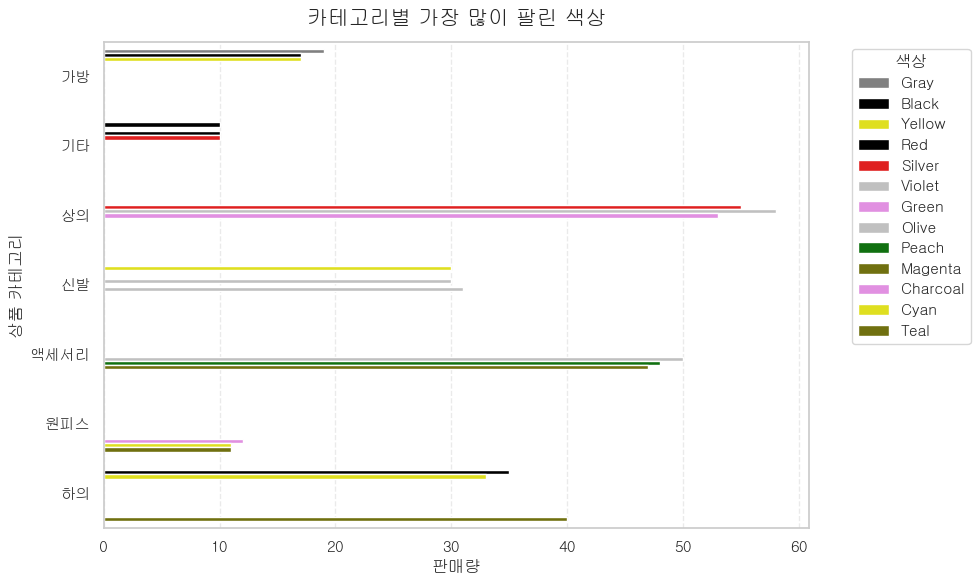

In [59]:
color_rank = (
    shopping_df.groupby(['Item Category (Refined)', 'Color'])
    .size()
    .reset_index(name='Count')
)

top3_colors = (
    color_rank
    .sort_values(['Item Category (Refined)', 'Count'], ascending=[True, False])
    .groupby('Item Category (Refined)')
    .head(3)
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top3_colors,
    x='Count',
    y='Item Category (Refined)',
    hue='Color',
    palette=top3_colors['Color'].tolist()
)

plt.title('카테고리별 가장 많이 팔린 색상', fontsize=15, pad=12)
plt.xlabel('판매량')
plt.ylabel('상품 카테고리')
plt.legend(title='색상', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### 07. 상관관계 및 교차분석
- 연속형 데이터 : 상관계수
- 범주형 데이터 : 교차표

> ### 할인 여부가 평점에 영향을 미칠까?

C:\Users\tj\AppData\Local\Temp\ipykernel_18496\1723357282.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_counts = shopping_df.groupby(['RatingGroup', 'Discount Applied']).size().reset_index(name='Count')


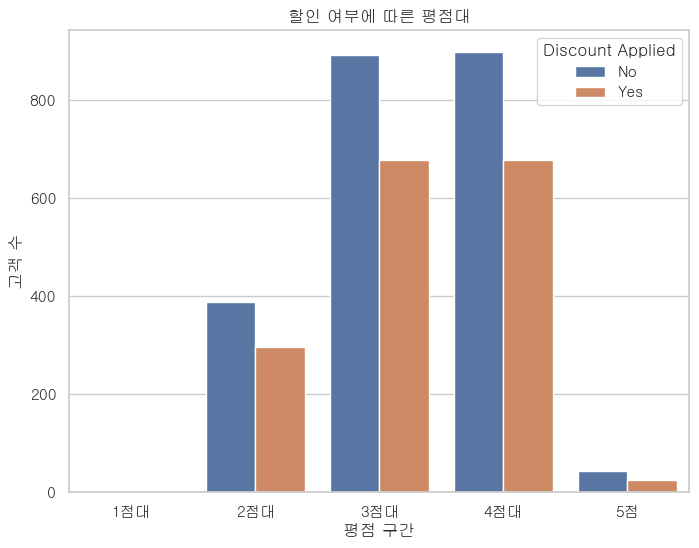

In [60]:
bins = [0.9, 1.9, 2.9, 3.9, 4.9, 5.1]
labels = ['1점대', '2점대', '3점대', '4점대', '5점']
shopping_df['RatingGroup'] = pd.cut(shopping_df['Review Rating'], bins=bins, labels=labels, right=True)

rating_counts = shopping_df.groupby(['RatingGroup', 'Discount Applied']).size().reset_index(name='Count')

plt.figure(figsize=(8,6))
sns.barplot(data=rating_counts, x='RatingGroup', y='Count', hue='Discount Applied')
plt.title('할인 여부에 따른 평점대')
plt.xlabel('평점 구간')
plt.ylabel('고객 수')
plt.show()

> ### 구독의 여부가 구매 주기에 영향을 미칠까?

   Subscription Status Frequency of Purchases  Count
0                   No               Annually    412
1                   No              Bi-Weekly    407
2                   No         Every 3 Months    430
3                   No            Fortnightly    389
4                   No                Monthly    404
5                   No              Quarterly    423
6                   No                 Weekly    382
7                  Yes               Annually    160
8                  Yes              Bi-Weekly    140
9                  Yes         Every 3 Months    154
10                 Yes            Fortnightly    153
11                 Yes                Monthly    149
12                 Yes              Quarterly    140
13                 Yes                 Weekly    157


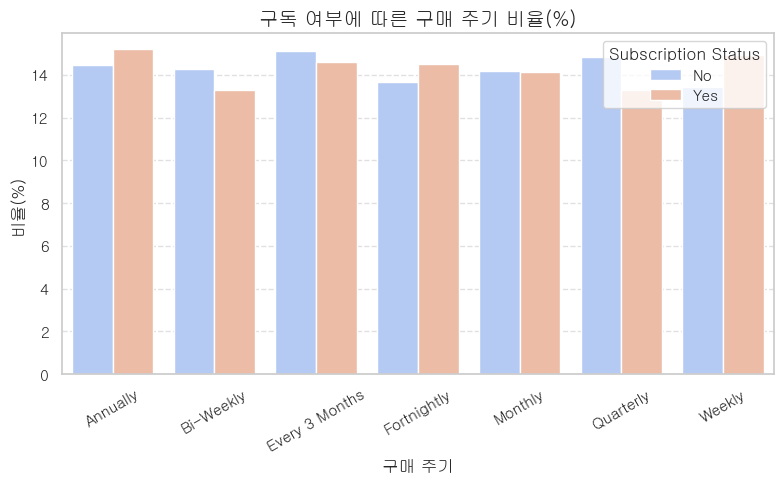

In [61]:
freq_sub = (
    shopping_df.groupby(['Subscription Status', 'Frequency of Purchases'])
    .size()
    .reset_index(name='Count')
)

print(freq_sub)

freq_sub['Percent'] = (
    freq_sub.groupby('Subscription Status')['Count']
    .transform(lambda x: (x / x.sum()) * 100)
)

plt.figure(figsize=(8,5))
sns.barplot(
    data=freq_sub,
    x='Frequency of Purchases',
    y='Percent',
    hue='Subscription Status',
    palette='coolwarm'
)

plt.title('구독 여부에 따른 구매 주기 비율(%)', fontsize=14)
plt.xlabel('구매 주기', fontsize=12)
plt.ylabel('비율(%)', fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Subscription Status')
plt.tight_layout()
plt.show()


> ### 배송방법이 평점에 영향을 미칠까?

C:\Users\tj\AppData\Local\Temp\ipykernel_18496\1684580480.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shopping_df.groupby(['RatingGroup', 'Shipping Type'])


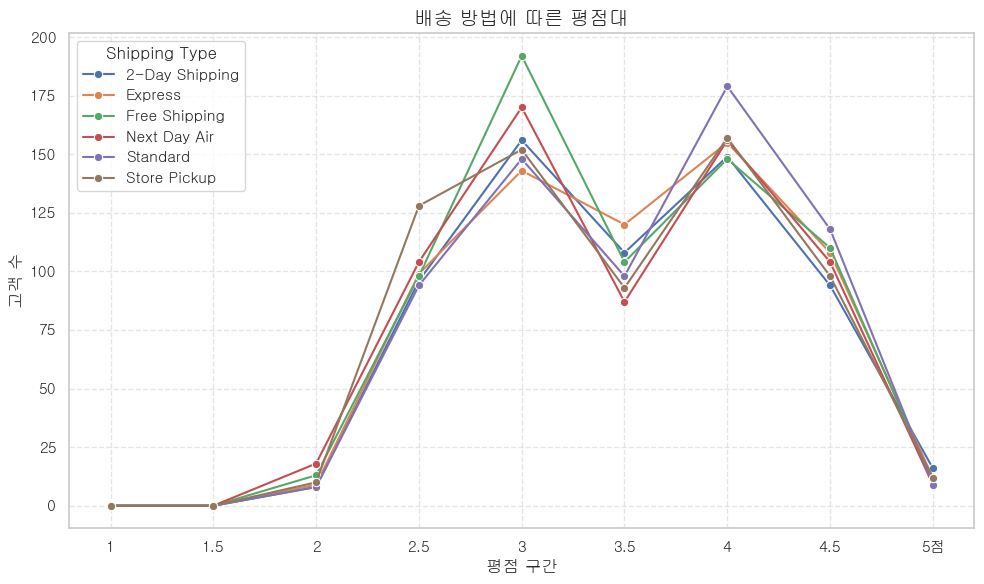

In [62]:
bins = [0.9, 1.5, 1.9, 2.5, 2.9, 3.5, 3.9, 4.5, 4.9, 5.1]
labels = ['1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5점']
shopping_df['RatingGroup'] = pd.cut(shopping_df['Review Rating'], bins=bins, labels=labels, right=True)

rating_counts = (
    shopping_df.groupby(['RatingGroup', 'Shipping Type'])
    .size()
    .reset_index(name='Count')
)

plt.figure(figsize=(10,6))
sns.lineplot(
    data=rating_counts,
    x='RatingGroup',
    y='Count',
    hue='Shipping Type',
    marker='o'
)

plt.title('배송 방법에 따른 평점대', fontsize=14)
plt.xlabel('평점 구간', fontsize=12)
plt.ylabel('고객 수', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\tj\AppData\Local\Temp\ipykernel_18496\3595785064.py:25: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\tj\AppData\Local\Temp\ipykernel_18496\3595785064.py:25: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\tj\AppData\Local\Temp\ipykernel_18496\3595785064.py:25: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\tj\AppData\Local\Temp\ipykernel_18496\3595785064.py:25: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\tj\AppData\Local\Temp\ipykernel_18496\3595785064.py:25: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\tj\AppData\Local\Temp\ipykernel_18496\3595785064.py:25: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\tj\

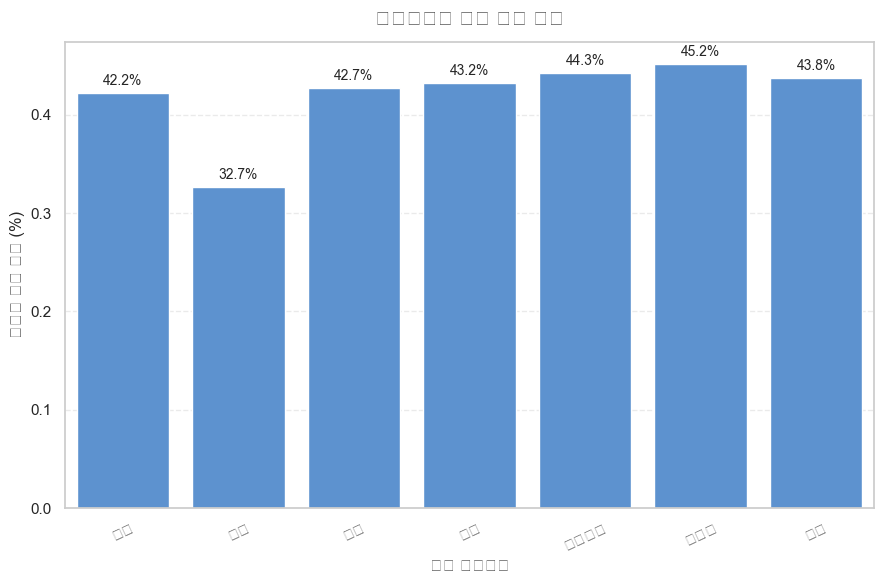

In [ ]:

sns.set_theme(style="whitegrid")
discount_ratio = (
    shopping_df.groupby('Item Category (Refined)')['Discount Applied']
    .value_counts(normalize=True)
    .rename('Ratio')
    .reset_index()
)
discount_yes = discount_ratio[discount_ratio['Discount Applied'] == 'Yes']
plt.figure(figsize=(9,6))
sns.barplot(
    data=discount_yes,
    x='Item Category (Refined)',
    y='Ratio',
    color='#4A90E2'
)

plt.title('카테고리별 할인 적용 비율', fontsize=15, pad=12)
plt.xlabel('상품 카테고리', fontsize=12)
plt.ylabel('할인된 거래 비율 (%)', fontsize=12)
plt.xticks(rotation=25)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

for i, val in enumerate(discount_yes['Ratio']):
    plt.text(i, val + 0.005, f"{val*100:.1f}%", ha='center', va='bottom', fontsize=10)

plt.show()


### 08. 데이터 전처리
- 결측치/중복값/이상치 처리
- 불필요한 컬럼 제거

In [64]:
## 해당내용 없음

### 09. Feature Engineering
Feature(독립변수, 속성, 열) 가공

- 새로운 변수 생성
- 그룹핑 처리
- 편향개선
- 스케일링 (범위변경)

### 문자형 -> 수치형
1. 범주형 -> 수치값
2. one-hot encoding 해당하는 값만 1이 되도록 변경

| 구분 | 주요 내용 | 세부 처리 내용 |
|:-----|:-----------|:----------------|
| **1. 새로운 변수 생성** | 지역 변수 및 상품 카테고리 변수 생성 | - 고객의 거주지(Location)를 기반으로 `동부(East)`, `중부(Central)`, `서부(West)`로 구분하는 `Region` 변수 생성<br>- 상품명(Item Purchased)을 기준으로 의류 및 패션 제품을 `상의`, `하의`, `원피스`, `신발`, `가방`, `액세서리`, `기타`로 재분류하는 `Item Category (Refined)` 변수 생성 |
| **2. 그룹핑 처리 및 범주 단순화** | 연령 및 평점 구간화 | - `Age` 변수를 구간별로 묶어 국가에서 지정한 표준 연령대로 `18~34` 청년층, `35~49` 중년층, `50~64` 장년층, `65~` 노년층 의 연령대를 생성하고, <br>- `Review Rating`을 1점대~5점대로 구간화하여 고객 만족도 분포 분석을 용이하게 하였음 |
| **3. 편향 개선** | 데이터 균형화 | - 지역별 및 연령대별 데이터 불균형 완화를 위해 각 그룹별 동일 인원 수(예: 65명, 1000명)로 샘플링 수행<br>- 표본 간 편차를 최소화하여 통계적 신뢰도 확보 |

### 10. 최종요약/인사이트 도출

### 1. 지역별 소비 패턴

- **서부 지역의 매출 편차가 다른 지역에 비해 두드러진다.**
- **하위 매출 지역은 구독률이 낮은 편이다.**

---

### 할인 및 구독 행태

- **할인 미적용 고객의 평균 구매금액이 할인 고객보다 높음**, 프로모션이 항상 매출 향상으로 이어지지 않는다.  
- **구독 여부에 따라 구매 주기가 명확히 구분되지는 않으며**, 구독 고객은 주간(Weekly) 혹은 격주(Fortnightly) 주기로 구매 비율이 높다.

---

### 배송 방식 및 리뷰 평점

- **무료 배송 혹은 기본 배송** 방식이 전체적인 평점 참여도가 높은 편이다.  
- 다만 **무료배송(Free Shipping)** 은 이용자 수는 많으나 평점을 높게 주는 편은 아니다.

---

### 상품 카테고리 및 색상 선호도

- 상의류 는 전 지역 공통 인기 품목으로, 지역별로 색상 선호도가 뚜렷히 다름.  
- **서부 지역**: 밝은 계열(White, Beige 등) 선호  
- **중부 지역**: 중간톤(Navy, Gray 등) 선호  
- **동부 지역**: 진한 색상(Maroon, Black 등) 선호 

---

### 인구통계적 특성

- **여성 고객의 평균 구매금액이 남성보다 높고**, 색상 선택 폭이 넓음.  

- **연령대별 선호 카테고리 차이**  
  - 20~30대 → Clothing 중심  
  - 40~50대 → Accessories 중심  
  - 60대 이상 → Footwear 중심  

---

### 리뷰 및 구매 행동

- **리뷰 평점이 높은 고객은 이전 구매 횟수도 많음**, 반복 구매자일수록 만족도가 높음.  
- **프로모션 코드 사용 고객은 리뷰 수가 많지만 평점은 중간 수준**, 가격 민감형 고객층의 특징으로 해석 가능.  

---